In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '..//src/')

import pandas as pd
import numpy as np
from datetime import datetime
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import icecream as ic

sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
export_fig_format = "pdf"
fig_format = "png"
dpi = 300
figsize = (12, 3.5)
figsize_map = (16, 8)

markers = ['P', 'o', '^', 's', '*', 'v']
linewidth = 0.1
edgecolor = 'black'

import main
from models import thermal_model
from common import functions, enums, schema
from data import source


ic| str_path: ('C:\\Users\\sceac10\\OneDrive - Cardiff '
               'University\\General\\resources\\Equipment_gain_profile_TM59.xlsx')
    sheet_name: 'Normalised'
ic| sum_profile: 1.0


In [3]:
PATH_GB_DATA = Path(r'C:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\00 - Final data\Annual_demand')
PATH_CIBSE_DATA = Path(r"C:\Users\sceac10\OneDrive - Cardiff University\General\data\CIBSE weather data\WD16SET\WD16SET\WDD16SET\WDD16SET\WMD16SET\WMD16SET")
PATH_RESULTS = Path(r'C:\Users\sceac10\OneDrive - Cardiff University\General\04 - Analysis')

In [4]:
temp_dataf = functions.get_LSOA_code_to_LADCD_lookup()
temp_dataf = temp_dataf.set_index(schema.geoLookupSchema.lsoa)

In [5]:
residential_data = main.import_thermal_characteristics_data(main.PATH_GB_DATA / 'Thermal_characteristics_afterEE.csv', 2020, 2050)

,LSOA_code,Local Authority,Region,Dwelling forms,Heating systems,Average thermal capacity kJ/K,Average thermal losses kW/K,Number of dwellings,Average annual heat demand kWh,Average floor area m2,Thermal capacity level,Outdoor air design temperature degreeC,ladcd,ladnm,CIBSE_city
Index,,,,,,,,,,,,,,,
0,S01006506,aberdeen city,North East Scotland,detached,gas boiler,43906.250000,0.273266,115,17533.867465,175.625000,medium,-5,S12000033,aberdeen city,Edinburgh
1,S01006506,aberdeen city,North East Scotland,detached,oil boiler,66000.000000,0.299051,14,19188.338395,264.000000,medium,-5,S12000033,aberdeen city,Edinburgh
2,S01006506,aberdeen city,North East Scotland,detached,biomass boiler,66187.500000,0.390676,1,25067.327542,264.750000,medium,-5,S12000033,aberdeen city,Edinburgh
3,S01006506,aberdeen city,North East Scotland,semi-detached,gas boiler,27846.153846,0.216864,68,13914.831788,111.384615,medium,-5,S12000033,aberdeen city,Edinburgh
4,S01006506,aberdeen city,North East Scotland,semi-detached,resistance heating,22055.555556,0.113292,2,7269.253731,88.222222,medium,-5,S12000033,aberdeen city,Edinburgh


In [6]:
filt = residential_data[schema.DwellingDataSchema.LADCD] == 'S12000013'
residential_data.loc[filt, :]


,LSOA_code,Local Authority,Region,Dwelling forms,Heating systems,Average thermal capacity kJ/K,Average thermal losses kW/K,Number of dwellings,Average annual heat demand kWh,Average floor area m2,Thermal capacity level,Outdoor air design temperature degreeC,ladcd,ladnm,CIBSE_city
Index,,,,,,,,,,,,,,,
23071,S01009014,na heileanan siar,Western Isles,flat,oil boiler,21000.000000,0.177005,3,10263.481804,84.000000,medium,-5,S12000013,na heileanan siar,Glasgow
23072,S01009014,na heileanan siar,Western Isles,detached,gas boiler,20750.000000,0.138050,7,8004.695498,83.000000,medium,-5,S12000013,na heileanan siar,Glasgow
23073,S01009014,na heileanan siar,Western Isles,detached,resistance heating,30150.000000,0.191470,81,11102.213230,120.600000,medium,-5,S12000013,na heileanan siar,Glasgow
23074,S01009014,na heileanan siar,Western Isles,detached,oil boiler,31918.750000,0.240507,131,13945.545571,127.675000,medium,-5,S12000013,na heileanan siar,Glasgow
23075,S01009014,na heileanan siar,Western Isles,detached,biomass boiler,31500.000000,0.261382,5,15156.000000,126.000000,medium,-5,S12000013,na heileanan siar,Glasgow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23510,S01009049,na heileanan siar,Western Isles,semi-detached,oil boiler,28000.000000,0.196840,5,11413.595483,112.000000,medium,-5,S12000013,na heileanan siar,Glasgow
23511,S01009049,na heileanan siar,Western Isles,semi-detached,biomass boiler,21000.000000,0.240137,8,13924.113011,84.000000,medium,-5,S12000013,na heileanan siar,Glasgow
23512,S01009049,na heileanan siar,Western Isles,terraced,resistance heating,19950.000000,0.147833,17,8571.977251,79.800000,medium,-5,S12000013,na heileanan siar,Glasgow


<AxesSubplot: >

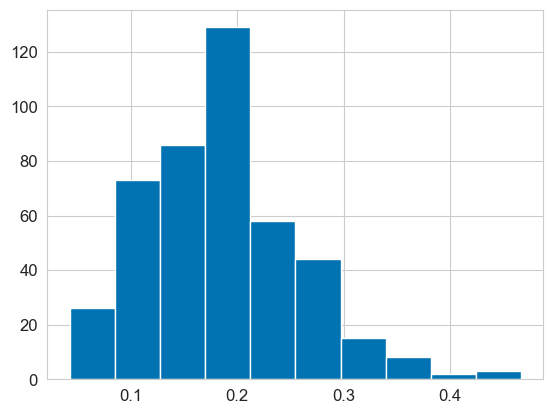

In [7]:
residential_data.loc[filt, schema.DwellingDataSchema.THERMAL_LOSSES].hist(bins=10)

In [8]:
filt = residential_data[schema.DwellingDataSchema.CIBSE_CITY] == 'London_LHR'
residential_data[filt]

,LSOA_code,Local Authority,Region,Dwelling forms,Heating systems,Average thermal capacity kJ/K,Average thermal losses kW/K,Number of dwellings,Average annual heat demand kWh,Average floor area m2,Thermal capacity level,Outdoor air design temperature degreeC,ladcd,ladnm,CIBSE_city
Index,,,,,,,,,,,,,,,


In [9]:
pathlist = Path(PATH_CIBSE_DATA).rglob('*_DSY2_2050High50*.csv')

for path in pathlist:
  print(path)
  print(f"{path.stem.split('_DSY2_')[0]},")

C:\Users\sceac10\OneDrive - Cardiff University\General\data\CIBSE weather data\WD16SET\WD16SET\WDD16SET\WDD16SET\WMD16SET\WMD16SET\Belfast_DSY2_2050High50_.csv
Belfast,
C:\Users\sceac10\OneDrive - Cardiff University\General\data\CIBSE weather data\WD16SET\WD16SET\WDD16SET\WDD16SET\WMD16SET\WMD16SET\Birmingham_DSY2_2050High50_.csv
Birmingham,
C:\Users\sceac10\OneDrive - Cardiff University\General\data\CIBSE weather data\WD16SET\WD16SET\WDD16SET\WDD16SET\WMD16SET\WMD16SET\Cardiff_DSY2_2050High50_.csv
Cardiff,
C:\Users\sceac10\OneDrive - Cardiff University\General\data\CIBSE weather data\WD16SET\WD16SET\WDD16SET\WDD16SET\WMD16SET\WMD16SET\Edinburgh_DSY2_2050High50_.csv
Edinburgh,
C:\Users\sceac10\OneDrive - Cardiff University\General\data\CIBSE weather data\WD16SET\WD16SET\WDD16SET\WDD16SET\WMD16SET\WMD16SET\Glasgow_DSY2_2050High50_.csv
Glasgow,
C:\Users\sceac10\OneDrive - Cardiff University\General\data\CIBSE weather data\WD16SET\WD16SET\WDD16SET\WDD16SET\WMD16SET\WMD16SET\Leeds_DSY2_205

In [ ]:
LA_str = "Cardiff"
column_names = [
  'Year', 'Month', 'Day', 'Hour', 'PWC', 'Cloud', 'DBT', 'WBT', 'RH', 'Press', 'WD', 'WS', 'GSR', 'DSR', 'Alt', 'Dec', 'Cloud1', 'DBT1', 'WBT1', 'Press1', 'WD1', 'WS1'
]
pathlist = Path(PATH_CIBSE_DATA).rglob('Cardiff_DSY2_2050High50*.csv')

list_files = []
for path in pathlist:
  print(path.stem)
  list_files.append(path.stem)
  temp_dataf = pd.read_csv(path, skiprows=32, header=None, delimiter=",", names=column_names)

Cardiff_DSY2_2050High50_


In [ ]:
external_data = functions.format_weather_data(temp_dataf)

In [ ]:
residential_data.head()

,LSOA_code,Local Authority,Region,Dwelling forms,Heating systems,Average thermal capacity kJ/K,Average thermal losses kW/K,Number of dwellings,Average annual heat demand kWh,Average floor area m2,Thermal capacity level,Outdoor air design temperature degreeC,CIBSE_city
Index,,,,,,,,,,,,,
0,S01006506,aberdeen city,North East Scotland,detached,gas boiler,43906.250000,0.273266,115,17533.867465,175.625000,medium,-5.0,Edinburgh
1,S01006506,aberdeen city,North East Scotland,detached,oil boiler,66000.000000,0.299051,14,19188.338395,264.000000,medium,-5.0,Edinburgh
2,S01006506,aberdeen city,North East Scotland,detached,biomass boiler,66187.500000,0.390676,1,25067.327542,264.750000,medium,-5.0,Edinburgh
3,S01006506,aberdeen city,North East Scotland,semi-detached,gas boiler,27846.153846,0.216864,68,13914.831788,111.384615,medium,-5.0,Edinburgh
4,S01006506,aberdeen city,North East Scotland,semi-detached,resistance heating,22055.555556,0.113292,2,7269.253731,88.222222,medium,-5.0,Edinburgh


In [11]:
residential_data.iloc[211857]

LSOA_code                                    E01017461
Local Authority                                Bedford
Region                                            East
Dwelling forms                                detached
Heating systems                             gas boiler
Average thermal capacity kJ/K             50028.518519
Average thermal losses kW/K                   0.425564
Number of dwellings                               1358
Average annual heat demand kWh            19136.069959
Average floor area m2                       200.114074
Thermal capacity level                          medium
Outdoor air design temperature degreeC              -3
ladcd                                        E06000055
ladnm                                          bedford
CIBSE_city                                  Birmingham
Name: 211857, dtype: object

In [44]:
LA_str  = "Cardiff"

filt = (residential_data[schema.DwellingDataSchema.LOCAL_AUTHORITY]==LA_str) & (residential_data[schema.DwellingDataSchema.THERMAL_CAPACITY_LEVEL]=="medium")
LA_residential_data = residential_data.loc[filt, :]
data_source = source.SimulationData(external_data)

sim_dataf = data_source.create_CIBSE_based_simulation_data()

row = LA_residential_data.iloc[0]
results_df = functions.run_simulation(sim_dataf.copy(), row, initial_indoor_air_temperature=21)
print(functions.print_heating_and_cooling_demand(results_df))

ic| heating_demand: 0.0, cooling_demand: -1986.5111540173584


(0.0, -1986.5111540173584)


<AxesSubplot: xlabel='Time_(h)'>

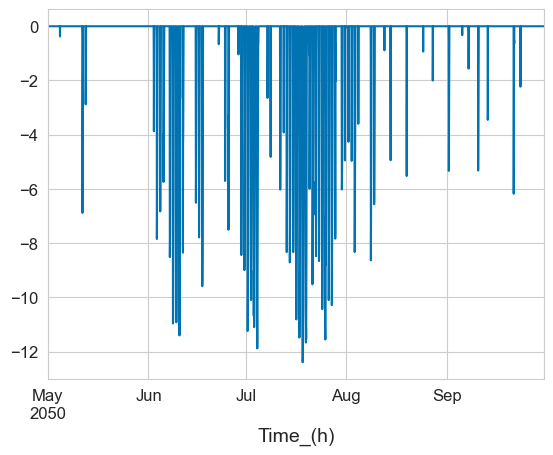

In [45]:
results_df[schema.DataSchema.HEATINGOUTPUT].plot()

<AxesSubplot: xlabel='Time_(h)'>

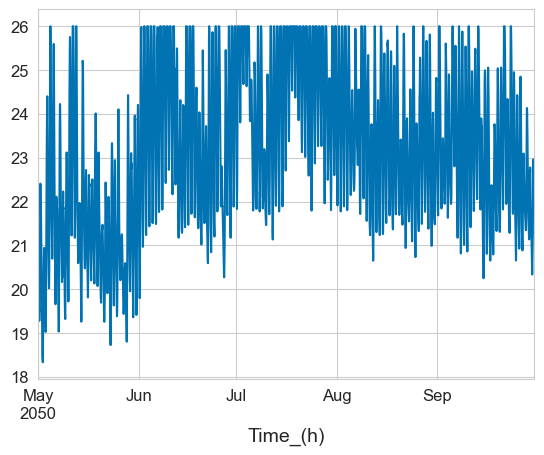

In [39]:
results_df[schema.DataSchema.IAT].plot()

<AxesSubplot: xlabel='Time_(h)'>

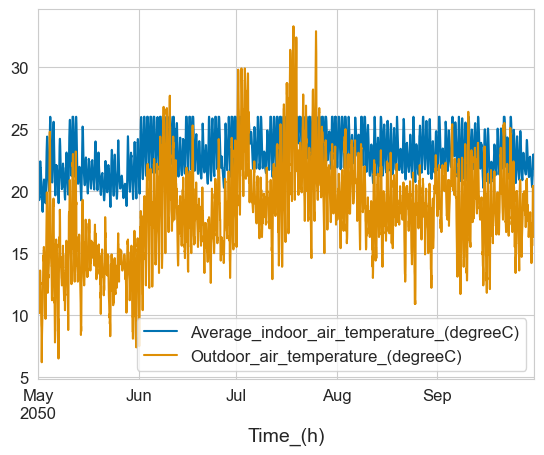

In [40]:
results_df[[schema.DataSchema.IAT,schema.DataSchema.OAT]].plot()

In [39]:
column_names = [
  'Year', 'Month', 'Day', 'Hour', 'PWC', 'Cloud', 'DBT', 'WBT', 'RH', 'Press', 'WD', 'WS', 'GSR', 'DSR', 'Alt', 'Dec', 'Cloud1', 'DBT1', 'WBT1', 'Press1', 'WD1', 'WS1'
]
pathlist = Path(PATH_CIBSE_DATA).rglob('Cardiff_DSY2_2050High50*.csv')

list_files = []
for path in pathlist:
  # ic.ic(path.stem)
  cibse_city = path.stem.split('_')[0]
  ic.ic(cibse_city)
  # list_files.append(path.stem)
  temp_dataf = pd.read_csv(path, skiprows=32, header=None, delimiter=",", names=column_names)
  weather_data = functions.format_weather_data(temp_dataf)
  data_source = source.SimulationData(weather_data)
  sim_dataf = data_source.create_CIBSE_based_simulation_data()
  filt_las = (residential_data[schema.DwellingDataSchema.CIBSE_CITY]==cibse_city)
  list_las = list(residential_data.loc[filt_las, schema.DwellingDataSchema.LOCAL_AUTHORITY].unique())
  for LA_str in list_las:
    ic.ic(LA_str)
    filt = ((residential_data[schema.DwellingDataSchema.LOCAL_AUTHORITY]==LA_str) 
            & (residential_data[schema.DwellingDataSchema.THERMAL_CAPACITY_LEVEL]=="medium"))
    LA_residential_data = residential_data.loc[filt, :]

    summary_results, metadata = functions.run_batch_simulation(LA_residential_data.head(), sim_dataf, PATH_RESULTS)
    # save_summary_results_path =  PATH_RESULTS/f'summary_results'
    # save_summary_results_path.mkdir(parents=True, exist_ok=True)
    # summary_results.to_parquet(save_summary_results_path/f'{LA_str}_summary_results.gzip')
    # save_metadata_path =  PATH_RESULTS/f'metadata'
    # save_metadata_path.mkdir(parents=True, exist_ok=True)
    # metadata.to_parquet(save_metadata_path/f'{LA_str}_metadata.gzip')

  

ic| cibse_city: 'Cardiff'
ic| LA_str: 'Isle of Anglesey'
ic| heating_demand: 0.0, cooling_demand: -1642.6138761909583
ic| heating_demand: 0.0, cooling_demand: -2016.872494530636
ic| heating_demand: 0.0, cooling_demand: -1619.0817822149652
ic| heating_demand: 0.0, cooling_demand: -1740.929754672045
ic| heating_demand: 0.0, cooling_demand: -2217.8690481386684
ic| LA_str: 'Gwynedd'
ic| heating_demand: 0.0, cooling_demand: -1295.8879150946323
ic| heating_demand: 0.0, cooling_demand: -1754.76233144727
ic| heating_demand: 0.0, cooling_demand: -1516.5579027073343
ic| heating_demand: 0.0, cooling_demand: -2355.4677708968666
ic| heating_demand: 0.0, cooling_demand: -2291.9346322822003
ic| LA_str: 'Conwy'
ic| heating_demand: 0.0, cooling_demand: -1163.9885897086592
ic| heating_demand: 0.0, cooling_demand: -2176.0919635228183
ic| heating_demand: 0.0, cooling_demand: -2979.035749528409
ic| heating_demand: 0.0, cooling_demand: -2310.7811791855856
ic| heating_demand: 0.0, cooling_demand: -2198.21165

In [ ]:
LA_residential_data

,LSOA_code,Local Authority,Region,Dwelling forms,Heating systems,Average thermal capacity kJ/K,Average thermal losses kW/K,Number of dwellings,Average annual heat demand kWh,Average floor area m2,Thermal capacity level,Outdoor air design temperature degreeC,CIBSE_city
Index,,,,,,,,,,,,,
406262,W01001694,Cardiff,Wales,detached,gas boiler,33083.123852,0.269136,23.0,13298.964256,132.332495,medium,-3.0,Cardiff
406263,W01001694,Cardiff,Wales,detached,resistance heating,24853.138514,0.072964,5.0,3605.426575,99.412554,medium,-3.0,Cardiff
406264,W01001694,Cardiff,Wales,semi-detached,gas boiler,23154.761905,0.183616,44.0,9073.148148,92.619048,medium,-3.0,Cardiff
406265,W01001694,Cardiff,Wales,semi-detached,resistance heating,13957.389286,0.074805,3.0,3696.381947,55.829557,medium,-3.0,Cardiff
406266,W01001694,Cardiff,Wales,terraced,gas boiler,24819.962687,0.205505,446.0,10154.740188,99.279851,medium,-3.0,Cardiff
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408488,W01001954,Cardiff,Wales,semi-detached,resistance heating,20720.998410,0.074287,1.0,3670.784346,82.883994,medium,-3.0,Cardiff
408489,W01001954,Cardiff,Wales,terraced,gas boiler,30375.000000,0.299129,37.0,14781.018519,121.500000,medium,-3.0,Cardiff
408490,W01001954,Cardiff,Wales,terraced,resistance heating,17711.822853,0.062646,1.0,3095.547568,70.847291,medium,-3.0,Cardiff


In [ ]:
temp_concat_results = pd.concat([LA_residential_data, summary_results], axis=1)
temp_concat_results.head()

,LSOA_code,Local Authority,Region,Dwelling forms,Heating systems,Average thermal capacity kJ/K,Average thermal losses kW/K,Number of dwellings,Average annual heat demand kWh,Average floor area m2,Thermal capacity level,Outdoor air design temperature degreeC,CIBSE_city,Specific heating demand (kWh/dwelling),Specific cooling demand (kWh/dwelling),Heating demand (kWh),Cooling demand (kWh)
Index,,,,,,,,,,,,,,,,,
406262,W01001694,Cardiff,Wales,detached,gas boiler,33083.123852,0.269136,23.0,13298.964256,132.332495,medium,-3.0,Cardiff,0.0,-1986.511154,0.0,-45689.756542
406263,W01001694,Cardiff,Wales,detached,resistance heating,24853.138514,0.072964,5.0,3605.426575,99.412554,medium,-3.0,Cardiff,0.0,-2003.836816,0.0,-10019.184081
406264,W01001694,Cardiff,Wales,semi-detached,gas boiler,23154.761905,0.183616,44.0,9073.148148,92.619048,medium,-3.0,Cardiff,0.0,-1440.043597,0.0,-63361.918283
406265,W01001694,Cardiff,Wales,semi-detached,resistance heating,13957.389286,0.074805,3.0,3696.381947,55.829557,medium,-3.0,Cardiff,0.0,-1010.558017,0.0,-3031.674052
406266,W01001694,Cardiff,Wales,terraced,gas boiler,24819.962687,0.205505,446.0,10154.740188,99.279851,medium,-3.0,Cardiff,0.0,-1515.812535,0.0,-676052.390539


In [ ]:
cooling_per_m2 = schema.ResultSchema.SPECIFICCOOLINGDEMAND.replace("kWh/dwelling", "kWh/m2")
temp_concat_results[cooling_per_m2] = temp_concat_results[schema.ResultSchema.SPECIFICCOOLINGDEMAND]/temp_concat_results["Average floor area m2"]
temp_concat_results[cooling_per_m2]

Index
406262   -43.997011
406263   -32.251961
406264   -43.851919
406265   -40.818495
406266   -44.100195
            ...    
408488   -35.420580
408489   -44.849022
408490   -35.193561
408491   -43.679816
408492   -27.932479
Name: Specific cooling demand (kWh/m2), Length: 1737, dtype: float64

In [ ]:
nb_dwellings = temp_concat_results["Number of dwellings"].sum()
total_floor_area = temp_concat_results["Average floor area m2"].sum()*nb_dwellings
print(f"In {LA_str}, there are {nb_dwellings:,.0f} dwellings for a total floor area of {total_floor_area/1_000_000:,.0f} km2")

In Cardiff, there are 144,220 dwellings for a total floor area of 22,501 km2


<AxesSubplot: xlabel='Dwelling forms'>

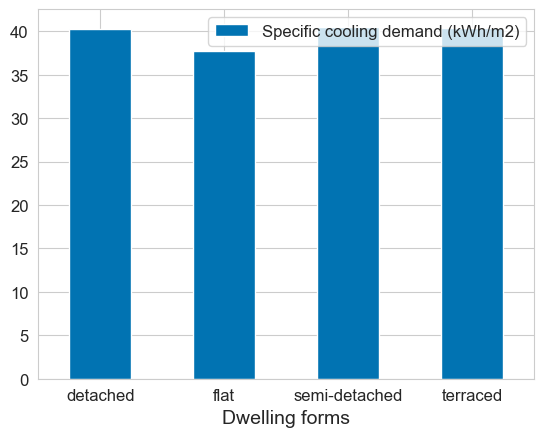

In [ ]:
(-temp_concat_results.groupby("Dwelling forms").agg({cooling_per_m2:"mean"})).plot.bar(rot=0)


<AxesSubplot: xlabel='Dwelling forms'>

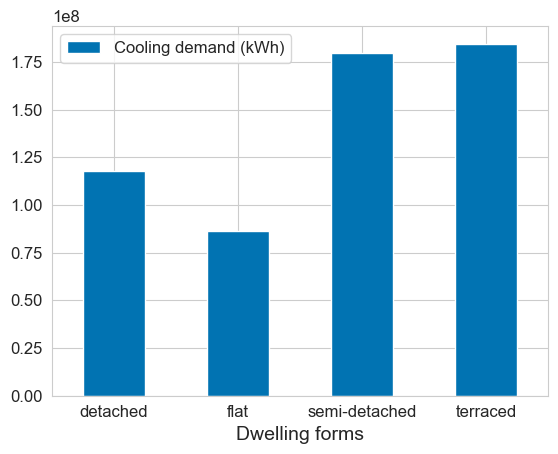

In [ ]:
(-temp_concat_results.groupby("Dwelling forms").agg({schema.ResultSchema.COOLINGDEMAND:"sum"})).plot.bar(rot=0)

<AxesSubplot: xlabel='Dwelling forms'>

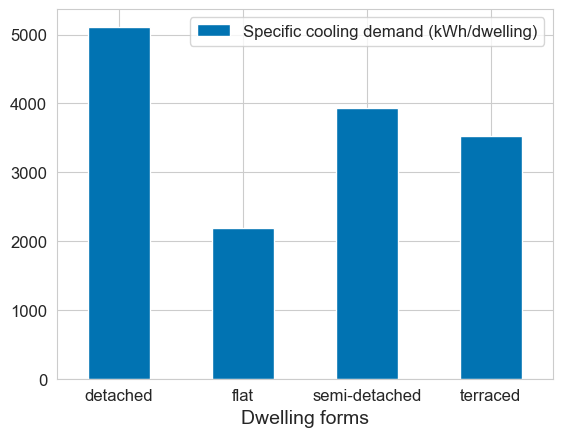

In [ ]:
(-temp_concat_results.groupby("Dwelling forms").agg({schema.ResultSchema.SPECIFICCOOLINGDEMAND:"mean"})).plot.bar(rot=0)

In [ ]:
temp_LA_results[schema.ResultSchema.COOLINGDEMAND].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Index
406262   -1.339114e+05
406263   -1.603125e+04
406264   -1.787070e+05
406265   -6.836636e+03
406266   -1.952704e+06
              ...     
408488   -2.935799e+03
408489   -2.016188e+05
408490   -2.493368e+03
408491   -2.496658e+05
408492   -1.425039e+05
Name: Cooling demand (kWh), Length: 1737, dtype: float64>